In [ ]:
conda activate CNN # optional

# Neural Networks

The neural network is the most important concept in deep learning, which is a subset of machine learning. Neural networks were inspired by biological neurons found in the brain of a human. You can think of a neural network as a machine learning algorithm that works the same way as a human brain. 

The reason we use neural networks when we already have so many machine learning algorithms is that a neural network needs a huge amount of data. As every business has now understood the importance of data, we have enough data to train a neural network. A neural network can easily outperform any machine learning algorithm while working on a very large data set.

## Neural Networks using Python

When training neural networks on a huge dataset, you should have a GPU compatible system, otherwise, it will take hours to run your code. If you don’t have a GPU compatible machine, you can always use Google Colab

Let's train a classification model with neural networks using python.

## Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

## Load Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_valid, x_train = x_train[:5000]/255.0, x_train[5000:]/255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

The Fashion MNIST dataset is just like the MNIST digits dataset but to understand what we are dealing with we need to create a Python list of names of the classes in the dataset

In [5]:
classes = ["T-shirt/top", "Trouser", "Pullover", 
           "Dress", "Coat", "Sandal", "Shirt", 
           "Sneaker", "Bag", "Ankle boot"]

## Creating a Neural Network model

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

## Model summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

Compiling a model is required to finalise the model and make it completely ready to use. For compilation, we need to specify an optimizer and a loss function. We can compile a model by using compile attribute.

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

## Train Model

In [9]:
history = model.fit(x_train, y_train, 
                    epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7131 - accuracy: 0.7682 - val_loss: 0.5116 - val_accuracy: 0.8280
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4908 - accuracy: 0.8287 - val_loss: 0.4621 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4488 - accuracy: 0.8426 - val_loss: 0.4340 - val_accuracy: 0.8504
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4209 - accuracy: 0.8521 - val_loss: 0.3987 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4021 - accuracy: 0.8591 - val_loss: 0.4127 - val_accuracy: 0.8530
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3860 - accuracy: 0.8637 - val_loss: 0.3795 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3724 - accuracy: 0.8692 - val_loss: 0.3739 - val_accuracy:

## Performance of the model

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

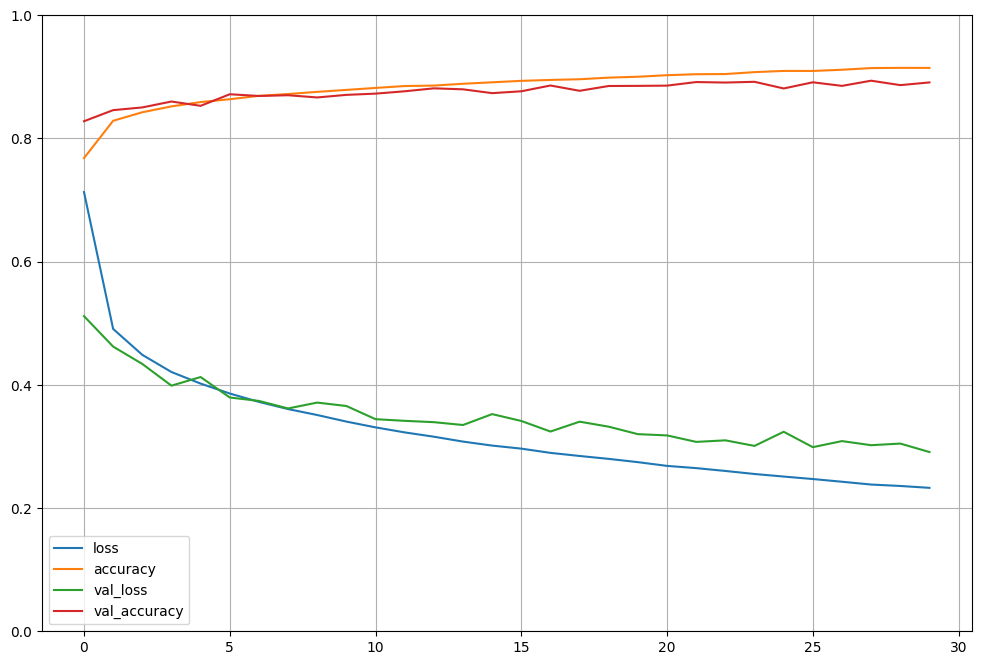

In [11]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.show()

## Accuracy Metrics

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x_new, y_new = x_test[:3], y_test[:3]

predict_x = model.predict(x_new) 
predict_new = np.argmax(predict_x, axis=1) # Imp for multi-class classification

print(predict_new)
print(np.array(classes)[predict_new])
print("Accuracy Score of prediction: ", accuracy_score(predict_new, y_new))

1/1 [==============================] - 0s 94ms/step
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
Accuracy Score of prediction:  1.0


In [14]:
y_predict = model.predict(x_test)
y_predict = np.argmax(y_predict, axis=1)

313/313 [==============================] - 1s 2ms/step


In the case of multi-class classification, we adopt averaging methods for F1 score calculation, resulting in a set of different **average scores (macro, weighted, micro)** in the classification report.
Resource: https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_predict)
print('Confusion Matrix\n')
print(confusion)

# accuracy: (tp + tn) / (p + n) 
# precision tp / (tp + fp) 
# recall: tp / (tp + fn) 
# f1: 2 tp / (2 tp + fp + fn)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_predict)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_predict, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_predict, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predict, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_predict, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_predict, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_predict, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_predict, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_predict, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=classes))

Confusion Matrix

[[861   9  20  13  13   1  61   0  22   0]
 [  1 983   0   7   6   0   1   0   2   0]
 [ 16  11 660   8 255   0  45   0   5   0]
 [ 19  40  15 808  90   0  13   0  15   0]
 [  0   2  29  10 938   0  14   0   7   0]
 [  1   1   0   0   0 942   0  14   9  33]
 [131  10  77  22 200   0 536   0  24   0]
 [  0   0   0   0   0  25   0 829   7 139]
 [  3   0   0   3   6   2   0   3 983   0]
 [  1   0   0   0   0   5   0   7   0 987]]

Accuracy: 0.85

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.86
Macro Recall: 0.85
Macro F1-score: 0.85

Weighted Precision: 0.86
Weighted Recall: 0.85
Weighted F1-score: 0.85

Classification Report

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1000
     Trouser       0.93      0.98      0.96      1000
    Pullover       0.82      0.66      0.73      1000
       Dress       0.93      0.81      0.86      1000
        Coat       0.62      0.94      0.7

## Conclusion

This is how we try to train a neural network using Python. Here I trained a neural network model for the task of classification on the fashion MNIST dataset.